In [7]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [8]:
dataframe = pandas.read_csv("iris.data", header=None)
dataset = dataframe.values
X = dataset[:,0:4].astype(float)
Y = dataset[:,4]

In [9]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
dummy_y = to_categorical(encoded_Y)

In [10]:
model = Sequential()
model.add(Dense(4, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [11]:
model.compile(optimizer='adam',loss='categorical_crossentropy',
metrics=['accuracy'])

In [12]:
history = model.fit(X, dummy_y, epochs=75, batch_size=10,
validation_split=0.1)

Epoch 1/75
14/14 [==============================] - 1s 16ms/step - loss: 1.0586 - accuracy: 0.3778 - val_loss: 1.1055 - val_accuracy: 0.0000e+00
Epoch 2/75
14/14 [==============================] - 0s 4ms/step - loss: 0.9430 - accuracy: 0.4000 - val_loss: 1.0010 - val_accuracy: 0.0000e+00
Epoch 3/75
14/14 [==============================] - 0s 5ms/step - loss: 0.8380 - accuracy: 0.5333 - val_loss: 0.9289 - val_accuracy: 0.0000e+00
Epoch 4/75
14/14 [==============================] - 0s 4ms/step - loss: 0.7542 - accuracy: 0.6815 - val_loss: 0.8704 - val_accuracy: 0.0000e+00
Epoch 5/75
14/14 [==============================] - 0s 5ms/step - loss: 0.6896 - accuracy: 0.7407 - val_loss: 0.8246 - val_accuracy: 0.0000e+00
Epoch 6/75
14/14 [==============================] - 0s 4ms/step - loss: 0.6387 - accuracy: 0.7407 - val_loss: 0.7954 - val_accuracy: 0.0000e+00
Epoch 7/75
14/14 [==============================] - 0s 3ms/step - loss: 0.5999 - accuracy: 0.7407 - val_loss: 0.7635 - val_accuracy: 0.

In [13]:
histories = []

def create_and_train_model(layers, epochs=75, batch_size=10, validation_split=0.1):
    model = Sequential()

    # Добавляем слои в модель
    for layer in layers:
        model.add(Dense(layer['neurons'], activation=layer['activation']))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Обучаем модель
    history = model.fit(X, dummy_y, epochs=epochs, batch_size=batch_size, validation_split=validation_split, verbose=0)

    # Сохраняем историю для построения графиков
    histories.append({
        'history': history,
        'name': f"Model {len(histories) + 1} - Layers: {len(layers)}, Neurons: {[layer['neurons'] for layer in layers]}"
    })


In [14]:
# Модель 1: 1 скрытый слой, 4 нейрона
create_and_train_model([
    {'neurons': 4, 'activation': 'relu'},  # Первый слой
    {'neurons': 3, 'activation': 'softmax'}  # Выходной слой
])

# Модель 2: 2 скрытых слоя, по 8 и 4 нейрона
create_and_train_model([
    {'neurons': 8, 'activation': 'relu'},
    {'neurons': 4, 'activation': 'relu'},
    {'neurons': 3, 'activation': 'softmax'}
])

# Модель 3: 3 скрытых слоя, по 16, 8 и 4 нейрона
create_and_train_model([
    {'neurons': 16, 'activation': 'relu'},
    {'neurons': 8, 'activation': 'relu'},
    {'neurons': 4, 'activation': 'relu'},
    {'neurons': 3, 'activation': 'softmax'}
])

# Модель 4: Разные параметры обучения (100 эпох, batch_size=20)
create_and_train_model([
    {'neurons': 4, 'activation': 'relu'},  # Первый слой
    {'neurons': 3, 'activation': 'softmax'}  # Выходной слой
], epochs=100, batch_size=20, validation_split=0.2)

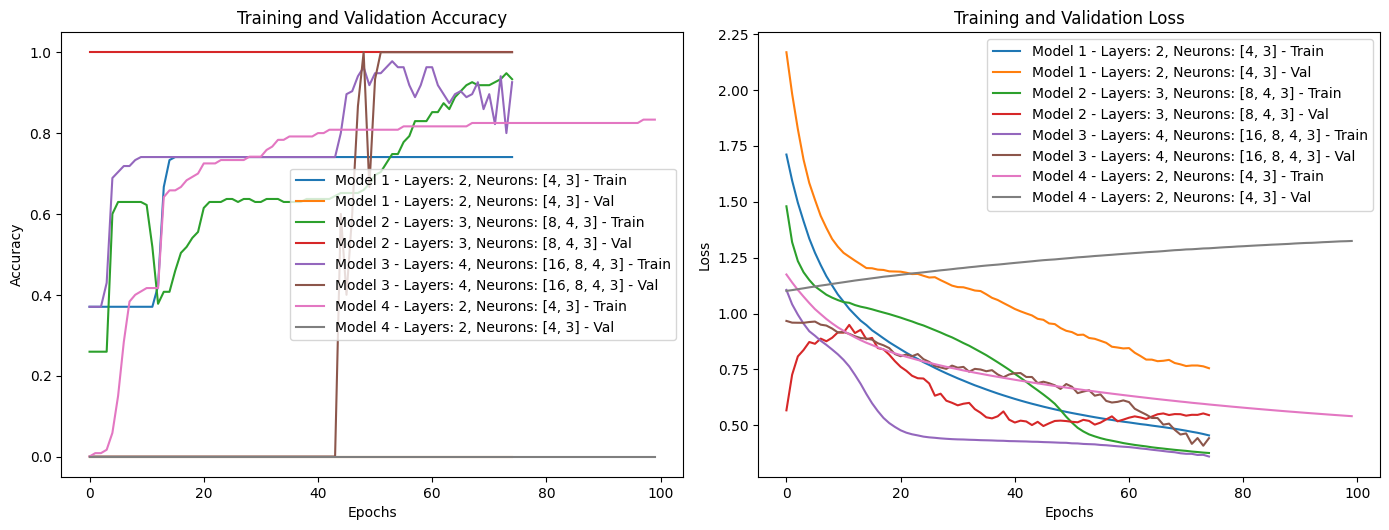

In [15]:
def plot_histories(histories):
    plt.figure(figsize=(14, 10))

    for i, hist in enumerate(histories):
        history = hist['history']
        name = hist['name']

        # График точности
        plt.subplot(2, 2, 1)
        plt.plot(history.history['accuracy'], label=f'{name} - Train')
        plt.plot(history.history['val_accuracy'], label=f'{name} - Val')

        plt.title('Training and Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        # График потерь
        plt.subplot(2, 2, 2)
        plt.plot(history.history['loss'], label=f'{name} - Train')
        plt.plot(history.history['val_loss'], label=f'{name} - Val')

        plt.title('Training and Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

    plt.tight_layout()
    plt.show()

plot_histories(histories)